https://velog.io/@choonsik_mom/ARIMA-SARIMA-auto-ARIMA%EB%A1%9C-%EC%82%BC%EC%A0%84-%EC%A3%BC%EA%B0%80-%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0

In [2]:
import os

import numpy as np
import pandas as pd
import pandas_datareader.data as pdr

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from statsmodels.tsa.arima.model import ARIMA

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
import random

import seaborn as sns
plt.style.use('seaborn-whitegrid')
import itertools
import warnings
warnings.filterwarnings('ignore')

C:\Users\USER\AppData\Local\Temp\ipykernel_13896\646858066.py:22: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [3]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

train = pd.read_csv('./train.csv')

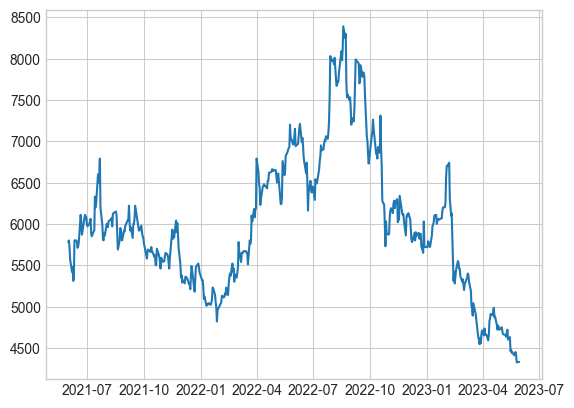

In [4]:
unique_codes = train['종목코드'].unique()
code = unique_codes[1]
train_close = train[train['종목코드'] == code][['일자', '종가']]
train_close['일자'] = pd.to_datetime(train_close['일자'], format='%Y%m%d')
#train_close.set_index('일자', inplace=True)
plt.plot(train_close.일자, train_close.종가)
plt.show()

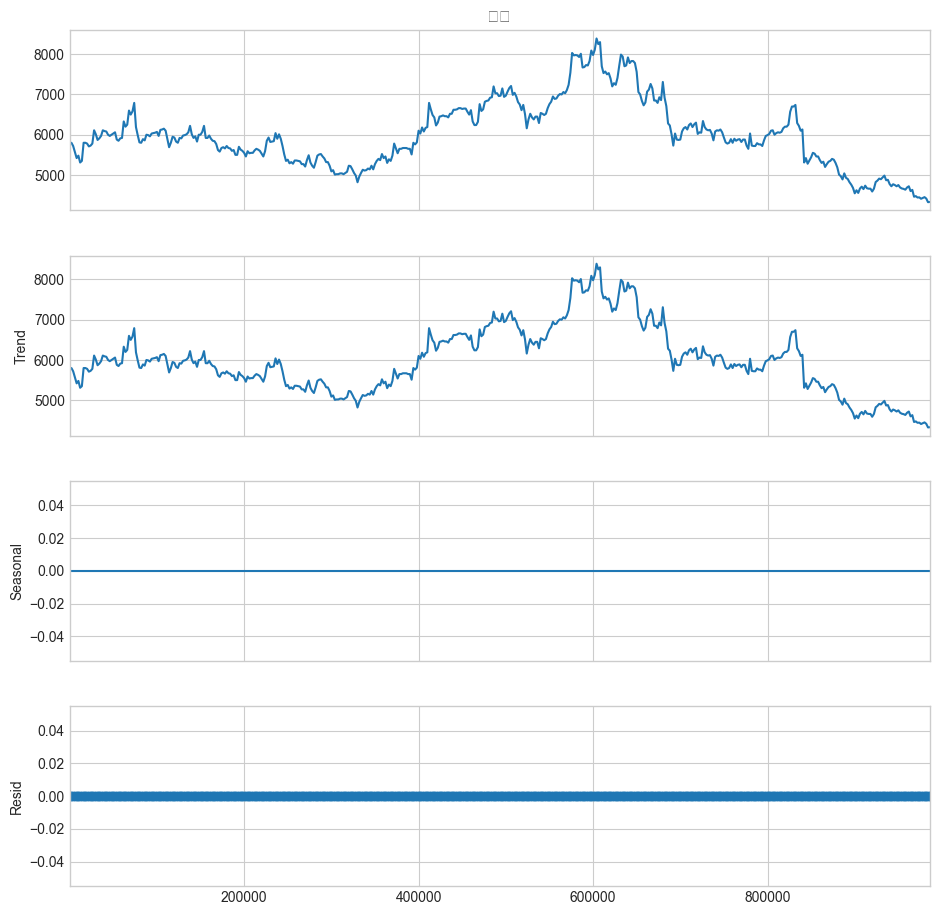

In [5]:
# seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(train_close['종가'], model='additive', period=1)
fig = decomposition.plot()
fig.set_size_inches(10, 10)
plt.show()

In [7]:
# split 8 : 2
train_data, test_data = train_test_split(train_close, test_size=0.2, shuffle=False)

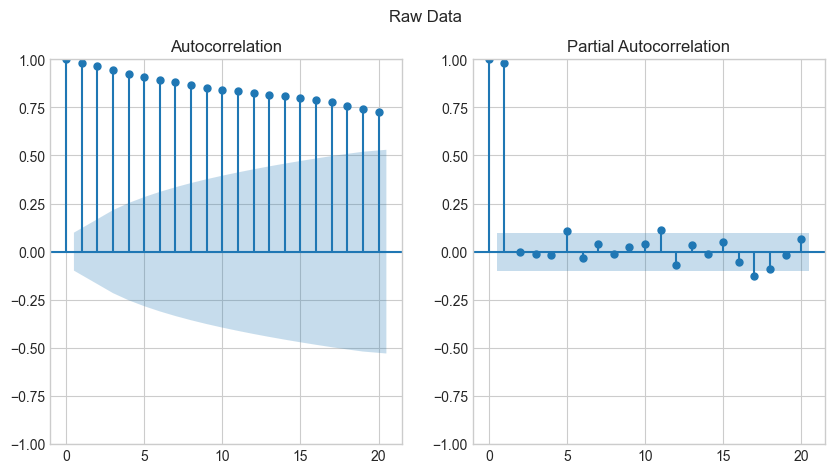

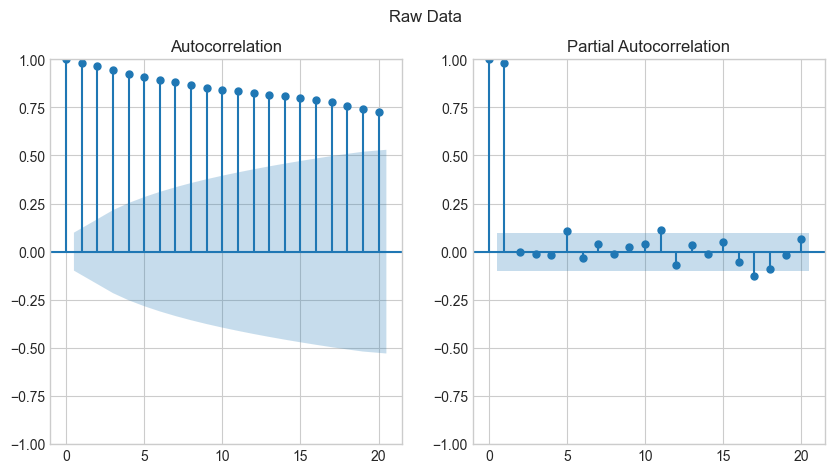

In [10]:
# ACF, PACF plot
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Raw Data')
sm.graphics.tsa.plot_acf(train_data['종가'].values.squeeze(), lags=20, ax=ax[0])
sm.graphics.tsa.plot_pacf(train_data['종가'].values.squeeze(), lags=20, ax=ax[1])

In [12]:
# Non-stationary -> stationary 보정 (차분, difference)
# differencing

diff_train_data = train_data.copy()
diff_train_data = diff_train_data['종가'].diff() # 차분
diff_train_data = diff_train_data.dropna() # 차분 후 생기는 결측치 제거
star = '*'
print(f'{star*15}Raw data{star*15}')
print(train_data['종가'].head())
print(f'{star*15}Differenced data{star*15}')
print(diff_train_data.head())

***************Raw data***************
1       5780
2001    5800
4001    5720
6001    5570
8001    5420
Name: 종가, dtype: int64
***************Differenced data***************
2001      20.0
4001     -80.0
6001    -150.0
8001    -150.0
10001     60.0
Name: 종가, dtype: float64


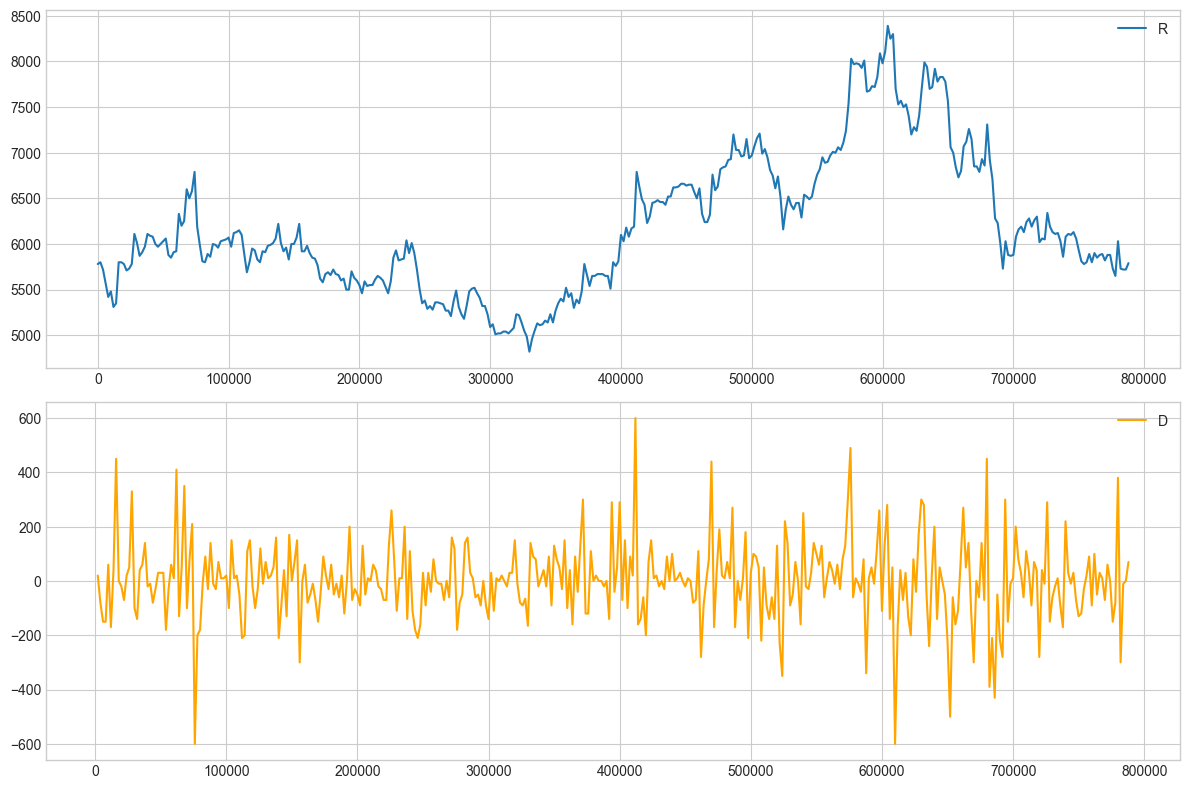

In [13]:
# 차분 시각화

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(train_data['종가'])
ax1.legend('Raw data (Non-stationary)')

ax2.plot(diff_train_data, color='orange' )
ax2.legend('Differenced data (stationary)')


plt.tight_layout()
plt.show()

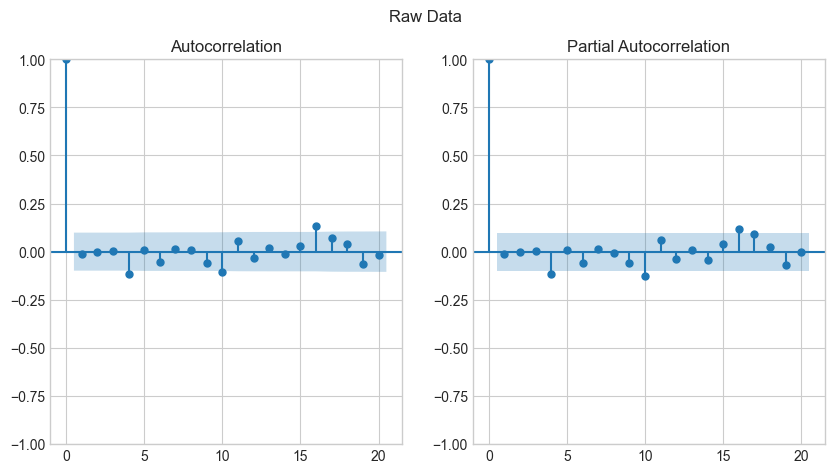

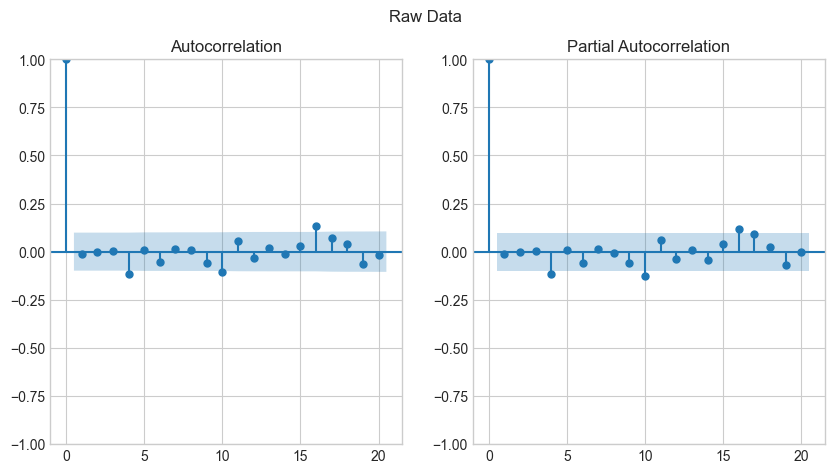

In [14]:
# ACF, PACF plot

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Raw Data')
sm.graphics.tsa.plot_acf(diff_train_data.values.squeeze(), lags=20, ax=ax[0])
sm.graphics.tsa.plot_pacf(diff_train_data.values.squeeze(), lags=20, ax=ax[1])

In [18]:
# 최적 파라미터 서치

p = range(0, 2)
d = range(1, 3)
q = range(0, 2)
pdq = list(itertools.product(p, d, q))

AIC = []
for i in pdq :
    print(i)
    model = ARIMA(train_data['종가'], order=(i))
    model_fit = model.fit()
    print(f'ARIMA pdq : {i} >> AIC : {round(model_fit.aic, 2)}')
    AIC.append(round(model_fit.aic, 2))

(0, 1, 0)


NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.
